# Netflix TV Shows Analysis

# Introduction

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform. This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States.

# TASKS & OBJECTIVES
* Understanding what content is available in different countries.
* Identifying the main content available on the streaming.
* Does Netflix has more focus on TV Shows than movies in recent years.
* Network analysis on the cast of the titles.
* Exploratory data analysis to find interesting insights.

# Data Wrangling and Inspection

Importing all the libraries required for proper analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


In [2]:
df =pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [3]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [5]:
df.drop(['description', 'imdb_id', 'imdb_votes', 'imdb_score'], axis=1, inplace = True)

In [6]:
df.shape

(5806, 11)

In [7]:
df.dropna(axis=0, how='any', inplace = True)

df.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [8]:
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,49.384,6.6


In [9]:
df.shape

(1683, 11)

In [10]:
credit = pd.read_csv("/kaggle/input/netflix-tv-shows-and-movies/credits.csv")
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [12]:
credit.describe()

,person_id
count,7.721300e+04
mean,4.994603e+05
std,6.128431e+05
min,7.000000e+00
25%,4.158400e+04
50%,1.829850e+05
75%,8.415570e+05
max,2.371585e+06


In [13]:
credit.shape

(77213, 5)

In [14]:
credit.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [15]:
credit.drop(['character' , 'person_id'], axis=1, inplace = True)

In [16]:
credit.head()

,id,name,role
0,tm84618,Robert De Niro,ACTOR
1,tm84618,Jodie Foster,ACTOR
2,tm84618,Albert Brooks,ACTOR
3,tm84618,Harvey Keitel,ACTOR
4,tm84618,Cybill Shepherd,ACTOR


# Exploratory Analysis

In [17]:
df.production_countries.value_counts()

['US']                687
['JP']                143
['KR']                114
['GB']                108
['ES']                 54
                     ... 
['NG']                  1
['AE']                  1
['KR', 'US']            1
['AE', 'SA', 'SY']      1
['FR', 'IT']            1
Name: production_countries, Length: 95, dtype: int64

In [18]:
#top 10 production countries

top10_countries= df.production_countries.value_counts().head(10)

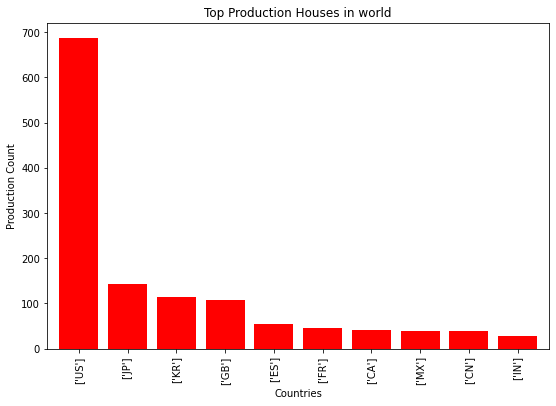

In [19]:
top10_countries.plot(kind= 'bar', width = 0.8, figsize=(9,6),  color= 'r')
plt.title("Top Production Houses in world")
plt.xlabel("Countries")
plt.ylabel("Production Count")
plt.show()

From the graph it is clear that the most produced series/movies are in US followed by Japan with 143

In [20]:
year_release = df.release_year.value_counts()
year_release.head()

2018    251
2021    250
2020    246
2019    245
2017    152
Name: release_year, dtype: int64

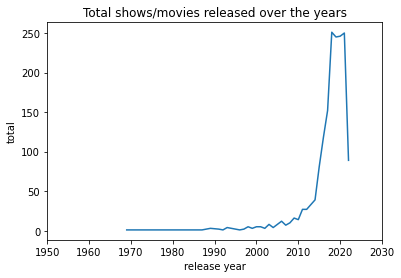

In [21]:
# plot a line graph to visualize the result
sns.lineplot(data =year_release)
plt.title('Total shows/movies released over the years')
plt.xlim(1950, 2030)
plt.xlabel('release year')
plt.ylabel('total')
plt.show()

The line graph shows a huge increase in production between 2010 and 2020. There has also been a great decrease in production from 2020 till date of this analysis.

# Age Certification

Check productions based on age certifications

In [22]:
age_certificate = df.age_certification.value_counts()
age_certificate.head()

TV-MA    814
TV-14    433
TV-PG    167
TV-Y7    103
TV-Y      92
Name: age_certification, dtype: int64

Text(0, 0.5, 'Total')

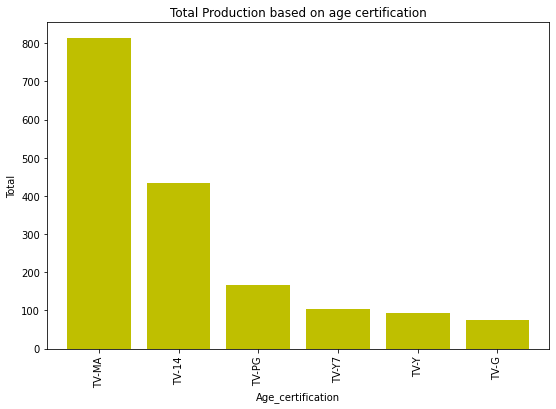

In [23]:
age_certificate.plot(kind= 'bar', width=0.8, figsize= (9,6), color= 'y')
plt.title("Total Production based on age certification")
plt.xlabel("Age_certification")
plt.ylabel("Total")

# Where is Focus of Netflix these days?

Is netflix focusing more on producing more web series or more movies

In [24]:
data_type = df.type.value_counts()
data_type.head()

SHOW    1683
Name: type, dtype: int64

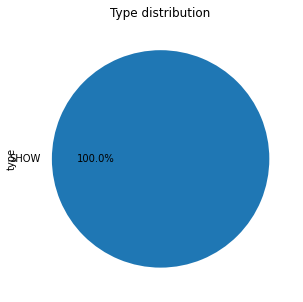

In [25]:
data_type.plot(kind= 'pie', figsize=(10, 5), autopct= '%1.1f%%')
plt.title('Type distribution')
plt.show()

From above we can see that these days Netflix is focusing more on producing web series. 

# Top rated TV shows/Movies on netflix

In [26]:
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3
29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,['comedy'],[],1.0,1.490,7.0
47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,['comedy'],['US'],9.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,1982,TV-PG,51,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,1984,TV-Y,10,"['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,49.384,6.6


In [27]:
#Sorting according to popularity and tmbd score of movie/tv shows
top_10_based_on_tmdb_rating = df.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['title','tmdb_score','tmdb_popularity', 'type']].head(10)
top_10_based_on_tmdb_rating

,title,tmdb_score,tmdb_popularity,type
1582,The Haunted House,10.0,13.649,SHOW
3988,Mighty Express,10.0,9.174,SHOW
4228,The Queen and the Conqueror,10.0,7.958,SHOW
5028,Smother-In-Law,10.0,7.430,SHOW
1600,Rainbow Ruby,10.0,6.616,SHOW
4645,The Charming Stepmom,10.0,6.550,SHOW
2182,Transformers: Rescue Bots Academy,10.0,6.511,SHOW
2786,The Unknown Hitman: The Story of El Cholo Adrián,10.0,6.419,SHOW
2194,Rainbow Rangers,10.0,5.692,SHOW
5765,Barbie: It Takes Two,10.0,5.321,SHOW


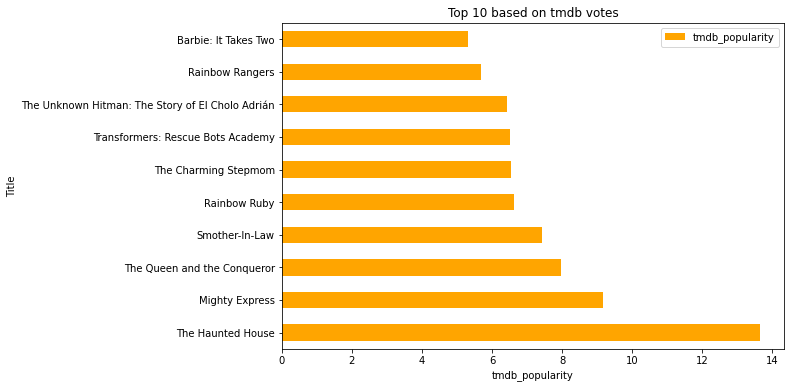

In [28]:
top_10_based_on_tmdb_rating.plot(kind='barh', x = 'title', y = 'tmdb_popularity', figsize=(9, 6), color = 'orange')
plt.title('Top 10 based on tmdb votes')
plt.xlabel('tmdb_popularity')
plt.ylabel('Title')
plt.show()

From the graph it is seen that Haunted House has more vote followed by Mighty Express

# Top directors and actors

In [29]:
data = df.merge(credit, how='outer', on='id')

In [30]:
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Graham Chapman,ACTOR
1,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Michael Palin,ACTOR
2,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Jones,ACTOR
3,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Eric Idle,ACTOR
4,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Gilliam,ACTOR


In [31]:
#filter only directors

directors= data[data['role']=='DIRECTOR']
directors.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
10,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972.0,TV-MA,43.0,['comedy'],[],1.0,1.490,7.0,Ian MacNaughton,DIRECTOR
46,ts2760,Fireman Sam,SHOW,1987.0,TV-Y,10.0,"['comedy', 'animation', 'family', 'crime', 'eu...",['GB'],13.0,25.697,7.3,Gary Andrews,DIRECTOR
146,ts21034,InuYasha,SHOW,2000.0,TV-14,25.0,"['action', 'comedy', 'scifi', 'animation', 'dr...",['JP'],9.0,149.742,8.6,Yasunao Aoki,DIRECTOR
147,ts21034,InuYasha,SHOW,2000.0,TV-14,25.0,"['action', 'comedy', 'scifi', 'animation', 'dr...",['JP'],9.0,149.742,8.6,Masashi Ikeda,DIRECTOR
213,ts224786,Escalona,SHOW,1991.0,TV-MA,44.0,['drama'],['CO'],1.0,9.244,7.7,Sergio Cabrera,DIRECTOR


In [32]:
#Sorting directors according to popularity and tmbd score
top10_directors = directors.sort_values(['tmdb_score', 'tmdb_popularity'],ascending =False)[['name','title','tmdb_score','tmdb_popularity','type']].head(10)
top10_directors

,name,title,tmdb_score,tmdb_popularity,type
3196,tooniverse,The Haunted House,10.0,13.649,SHOW
10615,Alex Cabral,Smother-In-Law,10.0,7.430,SHOW
3223,Shin Tae sik,Rainbow Ruby,10.0,6.616,SHOW
9675,Peerapol Kirdjareun,The Charming Stepmom,10.0,6.550,SHOW
11550,Phil Allora,Action Pack,10.0,3.669,SHOW
11551,Jae Woo Kim,Action Pack,10.0,3.669,SHOW
9700,Donnie Lai Cheun-Yu,Futmalls.com,10.0,3.412,SHOW
9114,Alberto Lecchi,Secreto bien guardado,10.0,2.343,SHOW
3346,Kwon Nam-ki,Magic Cellphone,10.0,2.159,SHOW
11124,Chiaki Kon,Pretty Guardians Sailor Moon Eternal The Movie,9.6,19.654,SHOW


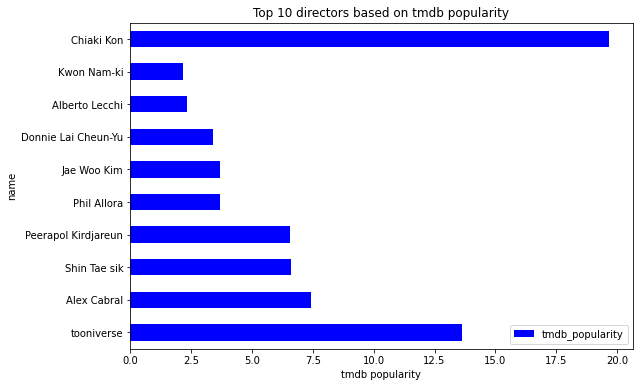

In [33]:
top10_directors.plot(kind= 'barh', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'blue')
plt.xlabel('tmdb popularity')
plt.ylabel('name')
plt.title('Top 10 directors based on tmdb popularity')
plt.show()

In [34]:
#filter actors
actors= data[data['role']=='ACTOR']
actors.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Graham Chapman,ACTOR
1,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Michael Palin,ACTOR
2,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Jones,ACTOR
3,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Eric Idle,ACTOR
4,ts22164,Monty Python's Flying Circus,SHOW,1969.0,TV-14,30.0,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Gilliam,ACTOR


In [35]:
#Sorting actors according to popularity and tmbd score
top10_actors = actors.sort_values(['tmdb_score', 'tmdb_popularity'],ascending =False)[['name','title','tmdb_score','tmdb_popularity','type']].head(10)
top10_actors

,name,title,tmdb_score,tmdb_popularity,type
9384,Emmanuel Esparza,The Queen and the Conqueror,10.0,7.958,SHOW
9385,Essined Aponte,The Queen and the Conqueror,10.0,7.958,SHOW
9386,Manuel Navarro,The Queen and the Conqueror,10.0,7.958,SHOW
9387,Álvaro Benet,The Queen and the Conqueror,10.0,7.958,SHOW
9388,Alejandro Rodriguez,The Queen and the Conqueror,10.0,7.958,SHOW
9389,Luis Mesa,The Queen and the Conqueror,10.0,7.958,SHOW
9390,Wolframio Sinué,The Queen and the Conqueror,10.0,7.958,SHOW
9391,Gilma Escobar,The Queen and the Conqueror,10.0,7.958,SHOW
9392,Maia Landaburu,The Queen and the Conqueror,10.0,7.958,SHOW
9393,Alejandro Muñoz,The Queen and the Conqueror,10.0,7.958,SHOW


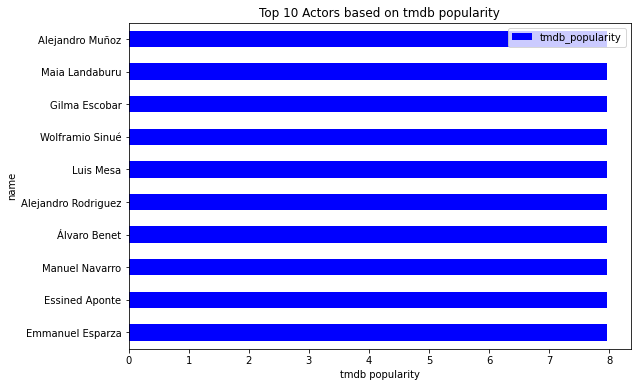

In [36]:
top10_actors.plot(kind= 'barh', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'blue')
plt.xlabel('tmdb popularity')
plt.ylabel('name')
plt.title('Top 10 Actors based on tmdb popularity')
plt.show()

# CONCLUSION
From the analysis of the Netflix dataset, I can conclusively state that 'US' had the highest number of independent production(1,912). Also, there was a huge decline in production since 2020 till date. The highly scored and popular director based on tmdb score and popularity is Tooniverse.

The limitation I encountered in the process of analysis was having to deal with null values in some columns. Columns that were non-essential to this analysis and columns that had high null values were removed. Also, records with null values were expunged because the total number of records with null values was insignificant(<10%)